In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import warnings
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import sklearn.impute
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
%matplotlib inline

# Introduction

    Purpose of this Epxirment is to play with Missing data.
    In cotagorical data and Numeric.
    There are different ways we can deal with catagorical data as given below
    1."Rmove Rows or columns" :Remove the complet row but problem is loss of information 
    2."Replace with Most Frequenet":Put most frequently used value in that particular colum
    but problem is imblancing data
    3."Apply classficiation algorithem" which is quite good then option "1" and "2"
    4."Apply clustering algorithem" which is consider a ver good solution 
    keep in mind all these could only apply to catagorical data 

#### Reading Train and Test File

In [2]:
#reading train
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")




#### checking shape

In [3]:
#How many rows and columns we have in both train and test
df_train.shape,df_test.shape

((1460, 81), (1459, 80))

#### checking data types

In [4]:
#How many type of nature data we have 
print(df_train.dtypes.value_counts())

print(df_test.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64
object     43
int64      26
float64    11
dtype: int64


##### checking null sapratly 

###### Catagorical

In [5]:
# Finding null in Catgorical dataset
# df_train[df_train.dtypes[df_train.dtypes=='object'].index].isnull().sum()

In [6]:
# Finding null in Catgorical dataset
# df_train[df_train.dtypes[df_train.dtypes!='object'].index].isnull().sum()

In [7]:
#Count the number of Nans each COlumns has
nans=pd.isnull(df_train).sum()
len(nans[nans>0].index),nans[nans>0].index

(19, Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
        'MiscFeature'],
       dtype='object'))

In [8]:
nans=pd.isnull(df_test).sum()

len(nans[nans>0].index),nans[nans>0].index

(33, Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
        'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
        'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType'],
       dtype='object'))

In [9]:
def extract_feat_name_for_nan(df_local):
    '''This function return feature having Nan'''
    nans=pd.isnull(df_local).sum()
    return list(nans[nans>0].index)

def feature_transformation(local_df):
    ''' SimpleImputer and Label Encoder'''
    ''' Purpose of this function is to fill nans in training feature 'X' for temperory time
        Note: Same feature 'X' nan will be prediction when it have to be treated as Target variable'''
    
    for col in local_df.columns:  
        
        # apply Imputer to nan feature of object datatype
        if (local_df[col].dtype=='object' and local_df[col].isnull().sum()>0) or local_df[col].dtype=='object':
            imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            imp=imp.fit(local_df[col].values.reshape(-1, 1))
            
            #Transformation of Label Encoding
            local_df[col]=imp.fit_transform(local_df[col].values.reshape(-1, 1))
            local_df[col]=LabelEncoder().fit_transform(list(local_df[col])).astype(float)
           
        elif local_df[col].dtype!='object':
            imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            imp=imp.fit(local_df[col].values.reshape(-1, 1))
            local_df[col]=imp.fit_transform(local_df[col].values.reshape(-1, 1)).astype(float)

            
    
    return local_df
def get_df_into_cleaning(df_local):
    
    #clean feature will be replace into this dataframe
    df_local_clean=df_local
    
    #if condition mean it only work for training dataset
    if 'SalePrice' in df_local.columns:
        df_local=df_local.drop('SalePrice',axis=1)
        
    #return feature having 'nan'    
    nan_feature=extract_feat_name_for_nan(df_local_clean)
    print(nan_feature)
    
    #iterating through feature having 'Nan'
    for cur_feature in nan_feature:
        
    
        #recopy it becouse
        df_local=df_local_clean.copy()
    
        
        print("Feature : ",cur_feature)
        print("Type    : ",df_local[cur_feature].dtypes)
        print(list(df_local[cur_feature].head(20).unique()))
        
        #Copy the dataset
        dummy=df_local.copy()


        #DataFrame without Current nan feature missing variable
        dummy_data=dummy[dummy.columns[dummy.columns!=cur_feature]]

        print(dummy_data.index)
        
        # replace all other nan feature with most feaquent number for temporory time
        dummy_data=feature_transformation(dummy_data)

        # put back Alley column in Dataset
        dummy_data[cur_feature]=dummy[cur_feature]


        # Split into Train and Test based on Nan
        train_data_exp=dummy_data[pd.notnull(dummy_data[cur_feature])]
        test_data_exp=dummy_data[pd.isnull(dummy_data[cur_feature])] #predicted will be fit here

        # Testing data for predicting
        X_test_E=test_data_exp.drop(cur_feature,axis=1)



        #Label Encoding target Column for train only where no Nan
        train_data_exp[cur_feature]=LabelEncoder().fit_transform(list(train_data_exp[cur_feature])).astype(float)

        #Apply model for prediction number for nan
        from sklearn.neighbors import KNeighborsClassifier

        X_train_E=train_data_exp.drop(cur_feature,axis=1)
        y_train_E=train_data_exp[cur_feature]

        classes=len(train_data_exp[cur_feature].value_counts())

        #Create KNN Classifier
        knn = KNeighborsClassifier(n_neighbors=classes)

        #Train the model using the training sets
        knn.fit(X_train_E, y_train_E)
        #Predict the response for test dataset
        y_pred = knn.predict(X_test_E)
        
        
        #Predicted  value will replace in dummy based on index in next step 
        dummy=feature_transformation(dummy)
        
 
        #Predicted value will put back on same indexes
        Nan_indexes=X_test_E.index

        #Predicted value will replace Nan 
        dummy[cur_feature][Nan_indexes]=y_pred

        # ''' Check predicted value against Orignal value'''
        # for index in zip(dummy[cur_feature],df_together[cur_feature]):
        #     print(index)
        '''After checking replace in Test and Train : all_dataset'''
        df_local_clean[cur_feature]=dummy[cur_feature]

        print("Done")
        nans=pd.isnull(df_local_clean).sum()
        print("Remaining feature : ",len(nans[nans>0]))
        
    return df_local_clean


df_train_clean=get_df_into_cleaning(df_train)
# df_test_clean=get_df_into_cleaning(df_test,df_test_clean)



['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Feature :  LotFrontage
Type    :  float64
[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan, 51.0, 50.0, 70.0, 91.0, 72.0, 66.0]
RangeIndex(start=0, stop=1460, step=1)
Done
Remaining feature :  18
Feature :  Alley
Type    :  object
[nan]
RangeIndex(start=0, stop=1460, step=1)
Done
Remaining feature :  17
Feature :  MasVnrType
Type    :  object
['BrkFace', 'None', 'Stone']
RangeIndex(start=0, stop=1460, step=1)
Done
Remaining feature :  16
Feature :  MasVnrArea
Type    :  float64
[196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0, 306.0, 212.0, 180.0]
RangeIndex(start=0, stop=1460, step=1)
Done
Remaining feature :  15
Feature :  BsmtQual
Type    :  object
['Gd', 'TA', 'Ex', nan]
RangeIndex(start=0, stop=1460, step=1)
Done
Remaining featu

    Now Lets see how much Nan column we have in full dataset

In [10]:
#check null in train
nans=pd.isnull(df_train_clean).sum()
nans[nans>0]

Series([], dtype: int64)

In [11]:
# #check null in Test
# nans=pd.isnull(df_test_clean).sum()
# nans[nans>0]

### check info

###### data types

In [12]:
#how many types we have df_test_clean : df_train_clean
df_train_clean.dtypes.value_counts()

int64      35
object     27
float64    19
dtype: int64

###### float

In [13]:
#check any  df_test_clean : df_train_clean
df_train_clean.dtypes[df_train_clean.dtypes=='float64'].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [14]:
#check any  df_test_clean : df_train_clean
for col in df_train_clean.dtypes[df_train_clean.dtypes=='float64'].index:
    print(col,df_train_clean[col].head(50).unique())

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  35.  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  31.  61.  48.  33.]
Alley [1. 0.]
MasVnrType [1. 2. 3.]
MasVnrArea [196.   0. 162. 350. 186. 240. 286. 306. 212. 180. 380. 281. 640. 200.
 246. 132. 650. 101. 412.]
BsmtQual [2. 3. 0.]
BsmtCond [3. 1.]
BsmtExposure [3. 1. 2. 0.]
BsmtFinType1 [2. 0. 5. 4. 1. 3.]
BsmtFinType2 [5. 1. 0. 4. 3.]
Electrical [4. 1. 0. 2.]
FireplaceQu [4. 2. 1. 3. 0.]
GarageType [1. 5. 3. 4.]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.    8. 1983. 1977.   36.]
GarageFinish [1. 2. 0.]
GarageQual [4. 1. 2.]
GarageCond [4. 1. 2.]
PoolQC [0. 1. 2.]
Fence [0. 2. 1.]
MiscFeature [2.]


###### Object 

In [15]:
#check any  df_test_clean : df_train_clean
df_train_clean.dtypes[df_train_clean.dtypes=='object'].index

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
#check any  df_test_clean : df_train_clean
for col in df_train_clean.dtypes[df_train_clean.dtypes=='object'].index:
    print(col,df_train_clean[col].head(50).unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV']
Street ['Pave']
LotShape ['Reg' 'IR1' 'IR2']
LandContour ['Lvl' 'Bnk']
Utilities ['AllPub']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac']
LandSlope ['Gtl']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe']
Condition2 ['Norm' 'Artery' 'RRNn']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer']
RoofStyle ['Gable' 'Hip' 'Gambrel']
RoofMatl ['CompShg']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng']
Exterior2nd ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace']
ExterQual ['Gd' 'TA' 'Ex']
ExterCond ['TA' 'Gd' 'Fa']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab']
Heating ['GasA']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa']
CentralAir ['Y' 'N']
Kit

###### Int

In [17]:
#check any  df_test_clean : df_train_clean
df_train_clean.dtypes[df_train_clean.dtypes=='int64'].index

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [18]:
#check any  df_test_clean : df_train_clean
for col in df_train_clean.dtypes[df_train_clean.dtypes=='int64'].index:
    print(col,df_train_clean[col].head(50).unique())

Id [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85]
LotArea [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420 11200 11924
 12968 10652 10920 11241 10791 13695  7560 14215  7449  9742  4224  8246
 14230  7200 11478 16321  6324  8500  8544 11049 10552  7313 13418 10859
  8532  7922  6040  8658 16905  9180  9200  7945  7658 12822 11096  4456
  7742]
OverallQual [7 6 8 5 9 4]
OverallCond [5 8 6 7 4]
YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966]
BsmtFinSF1 [ 706  978  486  216  655  732 1369  859    0  851  906  998  737  733
  578  646  504  840

#####    Transoformation None 'nan' Catagorical Feature 

In [19]:
for col in df_train_clean.dtypes[df_train_clean.dtypes=='object'].index:
    '''All object data will be convert to float'''
    df_train_clean[col]=LabelEncoder().fit_transform(list(df_train_clean[col])).astype(float)
    print(list(df_train_clean[col].head(10)))    

[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[4.0, 2.0, 4.0, 0.0, 2.0, 4.0, 4.0, 0.0, 4.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[5.0, 24.0, 5.0, 6.0, 15.0, 11.0, 21.0, 14.0, 17.0, 3.0]
[2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 0.0, 0.0]
[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[5.0, 2.0, 5.0, 5.0, 5.0, 0.0, 2.0, 5.0, 0.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[12.0, 8.0, 12.0, 13.0, 12.0, 12.0, 12.0, 6.0, 3.0, 8.0]
[13.0, 8.0, 13.0, 15.0, 13.0, 13.0, 13.0, 6.0, 15.0, 8.0]
[2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[2.0, 1.0, 2.0, 0.0, 2.0, 5.0, 2.0, 1.0, 0.0, 0.0]
[1.0, 1.0, 1

In [20]:
# for col in df_test_clean.dtypes[df_test_clean.dtypes=='object'].index:
#     '''All object data will be convert to float'''
#     df_test_clean[col]=LabelEncoder().fit_transform(list(df_test_clean[col])).astype(float)
#     print(list(df_test_clean[col].head(10)))    

#####    Take Dadtaset back to It's Position Local Training

In [81]:
# df_train=df_train_clean.iloc[:1460]
# df_test=df_train_clean.iloc[1460:]

df_train=df_train_clean

# df_train_clean

In [82]:
# df_test=df_test_clean
# df_train=df_train_clean

In [83]:
# check df_trian | df_test
nans=pd.isnull(df_train).sum()
nans[nans>0]

Series([], dtype: int64)

In [84]:
# check df_trian | df_test
df_train_clean.dtypes.value_counts()

float64    46
int64      35
dtype: int64

#### Heatmap for Missing data

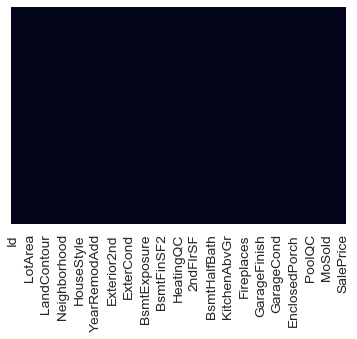

In [85]:
#check 
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

### Build ML model and compare the performance of the selected feature

In [86]:
def run_randomForest(X_train_l,y_train_l, X_test_l, y_test_l):
    clf_gb = GradientBoostingRegressor(n_estimators=200,random_state=0)
    clf_gb.fit(X_train_l,y_train_l)
    y_pred_gb = clf_gb.predict(X_test_l)
    print("Mean Squer Error",mean_squared_error(y_test_l,y_pred_gb))
    print("sqrt of Mean Sauer Error ",np.sqrt(mean_squared_error(y_test_l,y_pred_gb)))






In [87]:
scaled_dataset = StandardScaler().fit_transform(df_train)
scaled_dataset=pd.DataFrame(scaled_dataset,columns=df_train.columns)


X=scaled_dataset.drop('SalePrice',axis=1)
y=scaled_dataset['SalePrice']



In [88]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
len(x_train.columns),x_train.columns
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1168, 80), (292, 80), (1168,), (292,))

# Estimation of coefficients of Linear Regression

In [89]:
sel=SelectFromModel(GradientBoostingRegressor(n_estimators=200,random_state=0))

In [90]:
sel.fit(x_train,y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9,
                                                    criterion='friedman_mse',
                                                    init=None,
                                                    learning_rate=0.1,
                                                    loss='ls', max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200,
                                                    

In [91]:
sel.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False])

In [92]:
# sel.estimator_.coef_

In [93]:
# mean = np.mean(np.abs(sel.estimator_.coef_))

In [94]:
# mean

In [95]:
# np.abs(sel.estimator_.coef_)

In [96]:
features = x_train.columns[sel.get_support()]
features


Index(['Alley', 'OverallQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'PoolQC'],
      dtype='object')

In [97]:

X_train_reg = sel.transform(x_train)
X_test_reg = sel.transform(x_test)


In [98]:

X_test_reg.shape

(292, 9)

In [99]:
%%time
run_randomForest(X_train_reg, y_train,X_test_reg, y_test)

Mean Squer Error 0.09754349139496073
sqrt of Mean Sauer Error  0.31231953412324487
CPU times: user 148 ms, sys: 2.59 ms, total: 151 ms
Wall time: 150 ms


In [100]:
%%time
run_randomForest(x_train, y_train,x_test, y_test)

Mean Squer Error 0.08520220717249559
sqrt of Mean Sauer Error  0.29189417118622907
CPU times: user 571 ms, sys: 3.43 ms, total: 574 ms
Wall time: 574 ms


## Feature selection by feature importance of random forest classifier

In [101]:
sel = SelectFromModel(GradientBoostingRegressor(n_estimators=200,random_state=0))
sel.fit(x_train, y_train)
sel.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False])

In [102]:
feature=x_train.columns[sel.get_support()]

In [103]:
features

Index(['Alley', 'OverallQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'GarageCars', 'PoolQC'],
      dtype='object')

In [104]:
np.mean(sel.estimator_.feature_importances_)

0.0125

In [105]:
sel.estimator_.feature_importances_

array([6.99053604e-04, 1.74739082e-04, 1.59981321e-03, 2.00374394e-03,
       9.04837490e-03, 0.00000000e+00, 3.41084612e-02, 9.24795432e-05,
       2.31137563e-06, 0.00000000e+00, 9.51234332e-05, 3.25017413e-04,
       1.31785755e-03, 4.40616875e-04, 1.17105694e-04, 6.70483010e-06,
       1.29089522e-04, 1.67017400e-01, 3.80087874e-03, 4.79768165e-03,
       3.55135926e-03, 6.73815747e-04, 8.68023139e-04, 6.21644815e-04,
       1.08181502e-04, 1.78969472e-04, 2.09792801e-03, 2.71241784e-04,
       9.13068303e-05, 1.05281982e-04, 1.34343206e-02, 2.26613634e-04,
       1.57999323e-03, 1.00879337e-03, 2.81043138e-02, 1.28558992e-04,
       3.18350371e-04, 1.69085513e-03, 2.50867857e-02, 0.00000000e+00,
       8.76607781e-05, 2.79615487e-03, 0.00000000e+00, 1.85963391e-02,
       6.51883311e-03, 3.81501224e-04, 7.45942630e-02, 2.21474502e-04,
       1.39918773e-04, 5.20139578e-04, 5.97247587e-05, 5.12659878e-05,
       6.21102959e-05, 2.39012278e-03, 6.37678423e-03, 2.57741173e-04,
      

In [106]:
x_train_rfc=sel.transform(x_train)
x_test_rfc=sel.transform(x_test)

In [107]:
%%time
run_randomForest(x_train_rfc, y_train,x_test_rfc, y_test)

Mean Squer Error 0.09754349139496073
sqrt of Mean Sauer Error  0.31231953412324487
CPU times: user 143 ms, sys: 2.49 ms, total: 146 ms
Wall time: 144 ms


# Recursive Feature Elimination (RFE)

In [108]:
from sklearn.feature_selection import RFE
sel = RFE(GradientBoostingRegressor(n_estimators=200,random_state=0))
sel.fit(x_train, y_train)


RFE(estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
                                        init=None, learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_iter_no_change=None,
                                        presort='auto', random_state=0,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [109]:
sel.get_support()

array([ True, False,  True,  True,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False,  True, False, False,  True])

In [110]:
feature=x_train.columns[sel.get_support()]

In [111]:
feature

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'MasVnrArea', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'PoolQC', 'Fence', 'MoSold',
       'SaleCondition'],
      dtype='object')

In [112]:

len(feature)


40

In [113]:
x_train_rfe=sel.transform(x_train)
x_test_rfe=sel.transform(x_test)

In [114]:
%%time
run_randomForest(x_train_rfe, y_train,x_test_rfe, y_test)

Mean Squer Error 0.07624449279990299
sqrt of Mean Sauer Error  0.27612405328022943
CPU times: user 370 ms, sys: 2.93 ms, total: 373 ms
Wall time: 371 ms


In [115]:

# X=df_train.drop('SalePrice',axis=1)
# y=df_train['SalePrice']
# from sklearn.ensemble import ExtraTreesRegressor
# clf_gb = ExtraTreesRegressor(n_estimators=200)
# clf_gb.fit(x_train,y_train)
# y_pred_gb = clf_gb.predict(df_test)


In [116]:
# pred=pd.DataFrame(y_pred_gb)
# sub_df=pd.read_csv('sample_submission.csv')
# datasets=pd.concat([sub_df['Id'],pred],axis=1)
# datasets.columns=['Id','SalePrice']
# datasets.to_csv('sample_submission.csv',index=False)

# Feature Visualization

###### prepare dataset

In [117]:
#selected feature 
feature_list=[]
feature_list.extend(feature)
feature_list.append("SalePrice")

In [118]:
#selected base data triming
df_dummy=df_train[feature_list]

# corrmat=df_train[feature_list].corr()

# k = 11 #number of variables for heatmap
# best_col = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# best_col

###### HeatMape

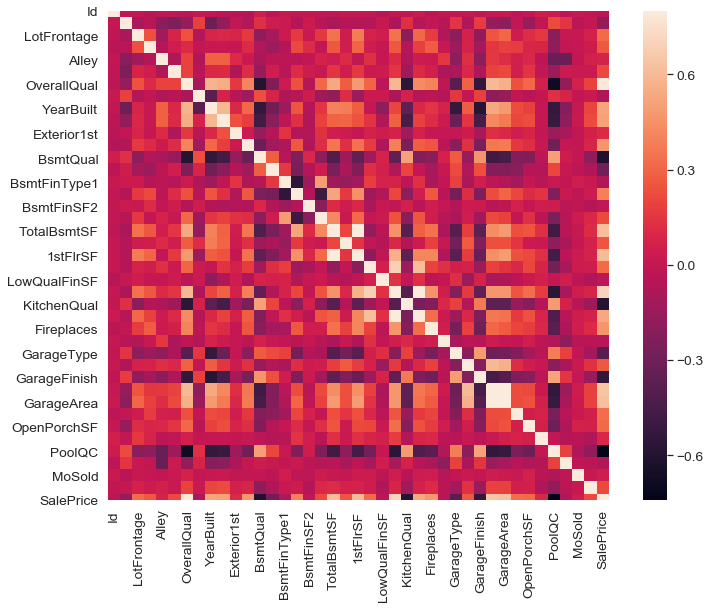

In [119]:
corrmat=df_dummy.corr()
f,a=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

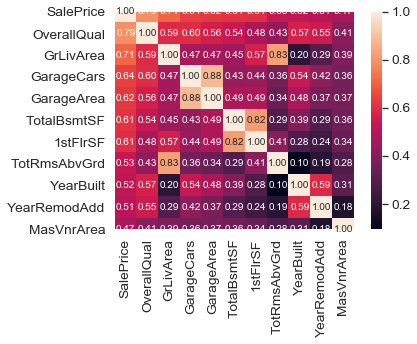

In [120]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(df_dummy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

    According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

    'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
    'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed 
    in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 
    'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we 
    just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 
    'SalePrice' is higher).
    'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our 
    first 
    guess was right (re-read 'So... What can we expect?').
    'FullBath'?? Really?
    'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
    Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to 
    think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get 
    this right. I'll leave this as a homework for you.
    Let's proceed to the scatter plots.

###### Scatter plot

In [121]:
# k = 15 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cols
# sns.set()
# sns.pairplot(df_dummy[cols], size = 2.5)
# plt.show();

###### Dealing Missing Value

In [122]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index


total=df_dummy[cols].isnull().sum().sort_values(ascending=False)
percent=(df_dummy[cols].isnull().sum()/df_dummy[cols].isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
MasVnrArea,0,0.0
YearRemodAdd,0,0.0
YearBuilt,0,0.0
TotRmsAbvGrd,0,0.0
1stFlrSF,0,0.0
TotalBsmtSF,0,0.0
GarageArea,0,0.0
GarageCars,0,0.0
GrLivArea,0,0.0
OverallQual,0,0.0


# out Liars!

    Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

    Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

###### Univeriate

In [123]:
# #standardizing data
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])#np.newaxis turn 1d to 2d and 2d to 3d
# low_range=saleprice_scaled[saleprice_scaled[:0]]
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]#argsort give sorted indecies of higher score in sorted order 
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('out range (low) of the distribution :')
print(low_range)
print('\nouter range (high) of the distrbution :')
print(high_range)


out range (low) of the distribution :
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distrbution :
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Bivariate analysis

###### 1 GrLivArea

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


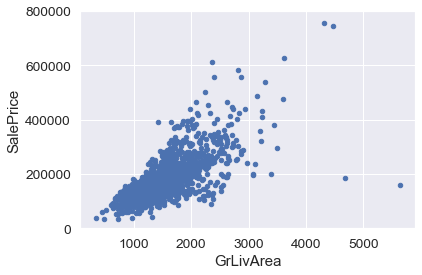

In [124]:
#bivarate analysis saleprice/grlivarea
#selecting best column for it
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

var='GrLivArea'
data=pd.concat([df_dummy['SalePrice'],df_dummy[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

###### identify outliers

In [125]:

df_dummy['GrLivArea'].describe()


count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

###### Remove outlier

In [126]:
# df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_dummy.sort_values(by='GrLivArea',ascending=False)['GrLivArea'][:10]

1298    5642
523     4676
1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
Name: GrLivArea, dtype: int64

In [127]:
# df_dummy = df_dummy.drop(df_dummy[df_dummy['Id'] == 1298].index)
# df_dummy = df_dummy.drop(df_dummy[df_dummy['Id'] == 523].index)
df_dummy=df_dummy.drop(1298,axis=0)
df_dummy=df_dummy.drop(523,axis=0)

In [128]:
df_dummy.sort_values(by='GrLivArea',ascending=False)['GrLivArea'][:10]

1182    4476
691     4316
1169    3627
185     3608
304     3493
1268    3447
635     3395
769     3279
1353    3238
496     3228
Name: GrLivArea, dtype: int64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


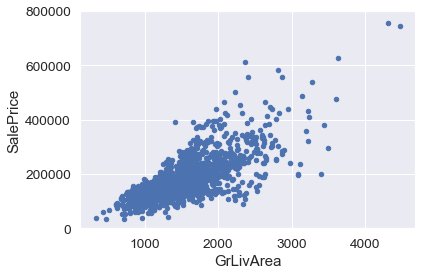

In [129]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

var='GrLivArea'
data=pd.concat([df_dummy['SalePrice'],df_dummy[var]],axis=1)
data.plot.scatter(x=var,y="SalePrice",ylim=(0,800000))

In [138]:
scaled_dataset = StandardScaler().fit_transform(df_dummy)
scaled_dataset=pd.DataFrame(scaled_dataset,columns=df_dummy.columns)


X=scaled_dataset.drop('SalePrice',axis=1)
y=scaled_dataset['SalePrice']


In [139]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
len(x_train.columns),x_train.columns
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1166, 40), (292, 40), (1166,), (292,))

In [140]:
%%time
run_randomForest(x_train, y_train,x_test, y_test)

Mean Squer Error 0.06266762134413409
sqrt of Mean Sauer Error  0.25033501821386095
CPU times: user 370 ms, sys: 2.83 ms, total: 373 ms
Wall time: 372 ms
